# Proyek Analisis Data: Bike Sharing
- **Nama:** Krishna Alvian Ramadhani
- **Email:** m180d4ky1416@bangkit.academy
- **ID Dicoding:** krishna_alvian_ramadhani_m180d4ky1416_tu6L


## Menentukan Pertanyaan Bisnis


- Apa hubungan cuaca dengan persewaan sepeda di hari kerja?
- Bagaimana perbedaan persewaan sepeda di hari libur dan hari kerja?

## Import Semua Packages/Library yang Digunakan

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

## Data Wrangling

### Gathering Data

**Load Data**


In [ ]:
hour_df = pd.read_csv("/content/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
day_df = pd.read_csv("/content/day.csv")
day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
print("Jumlah duplikasi data: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi data:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
print("Jumlah duplikasi data: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi data:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [ ]:
day_df.drop_duplicates(inplace=True)

In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Karena tidak ada data duplikat dan tidak ada  ada data yang perlu dihilangkan atau dibersihkan. Oleh karena itu, menghilangkan kolom dan memberikan penjelasan lebih pada kolom dari data yang digunakan agar lebih mudah dalam mengidenfitikasi suatu permasalahan bisnis

In [ ]:
drop_col = ['instant', 'windspeed', 'atemp']

for i in day_df.columns:
    if i in drop_col:
        day_df.drop(labels=i, axis=1, inplace=True)

day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,82,1518,1600


In [ ]:
# Mengubah nama kolom
day_df = day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather',
    'temp': 'temperature',
    'hum': 'humadity',
    'cnt': 'count'
})
day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather,temperature,humadity,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,82,1518,1600


Pembacaan angka diatas menjadi suatu keterangan
Month urut berdasarkan bulan Januari (1) hingga Desember (12)
Season dibagi menjadi 4 yaitu (1) Spring, (2) Summer, (3) Fall, dan (4) Winter
Weekday urut berdasarkan hari mulai dari Minggu (0) hingga Sabtu (6)
Weather dibagi menjadi 4 yaitu (1) Cerah, (2) Berawan, (3) Hujan, dan (4) Ekstrem

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dateday      731 non-null    object 
 1   season       731 non-null    int64  
 2   year         731 non-null    int64  
 3   month        731 non-null    int64  
 4   holiday      731 non-null    int64  
 5   weekday      731 non-null    int64  
 6   workingday   731 non-null    int64  
 7   weather      731 non-null    int64  
 8   temperature  731 non-null    float64
 9   humadity     731 non-null    float64
 10  casual       731 non-null    int64  
 11  registered   731 non-null    int64  
 12  count        731 non-null    int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 80.0+ KB


## Exploratory Data Analysis (EDA)

### Explore Data day_df

In [ ]:
day_df.groupby(by='weather').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
          max  min         mean      sum
weather                                 
1        8714  431  4876.786177  2257952
2        8362  605  4035.862348   996858
3        4639   22  1803.285714    37869

In [ ]:
day_df.groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean']
})


count                  
             max  min         mean
workingday                        
0           8714  605  4330.168831
1           8362   22  4584.820000

In [ ]:
day_df.groupby(by='holiday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

In [ ]:
day_df.groupby(by='weekday').agg({
    'count':['max','min','mean']
})

count                   
          max   min         mean
weekday                         
0        8227   605  4228.828571
1        7525    22  4338.123810
2        7767   683  4510.663462
3        8173   441  4548.538462
4        7804   431  4667.259615
5        8362  1167  4690.288462
6        8714   627  4550.542857


## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa hubungan cuaca dengan persewaan sepeda di hari kerja?

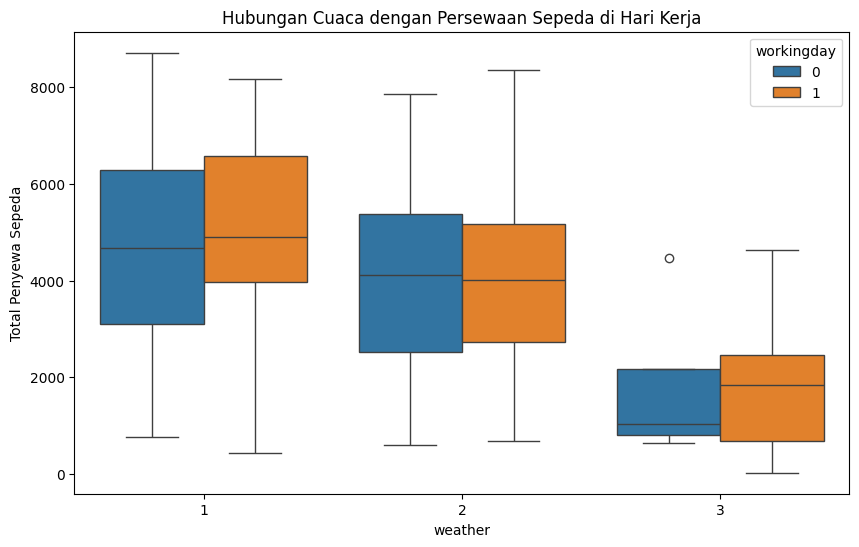

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=day_df, x='weather', y='count', hue='workingday')
plt.title('Hubungan Cuaca dengan Persewaan Sepeda di Hari Kerja')
plt.xlabel('weather')
plt.ylabel('Total Penyewa Sepeda')
plt.show()

### Pertanyaan 2: Bagaimana perbedaan persewaan sepeda di hari kerja dan hari biasa

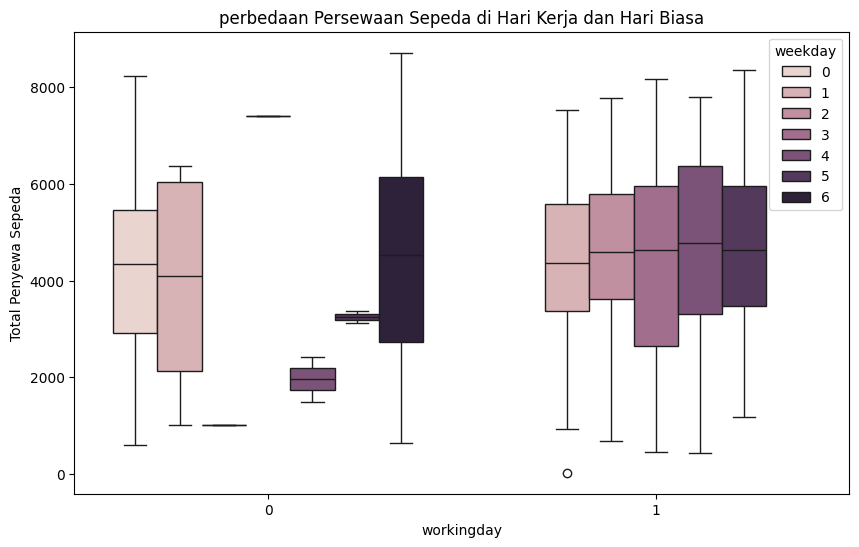

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=day_df, x='workingday', y='count', hue='weekday')
plt.title('perbedaan Persewaan Sepeda di Hari Kerja dan Hari Biasa')
plt.xlabel('workingday')
plt.ylabel('Total Penyewa Sepeda')
plt.show()

## Conclusion

- Dari hasil didapatkan kesimpulan bahwa terdapat hubungan antara persewaan sepeda dengan cuaca. Pada cuara cerah (1) dan di hari kerja pada plot didapatkan hasil yang cukup besar. Apabila di cuaca hujan (3) penyewa sepeda cukup sedikit. Oleh karena itu, dapat disimpulkan bahwa cuaca akan mempengaruhi persewaan sepeda
- Terdapat perbedaan antara persewaan di hari kerja dan hari biasa. Pada hari biasa persewaan sepeda cenderung hanya di hari Sabtu dan Minggu dengan plot yang sangat lebar. Namun, pada hari kerja plot dari hari Senin-Jumat cukup lebar.

In [ ]:
!pip freeze > requirements.txt